# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.223588e+01     8.591512e+00
 * time: 0.0017430782318115234
     1     3.072402e+01     5.085588e+00
 * time: 0.005625009536743164
     2     2.225914e+01     6.807960e+00
 * time: 0.009731054306030273
     3     1.565310e+01     4.503848e+00
 * time: 0.01402902603149414
     4     1.199547e+01     1.748239e+00
 * time: 0.017969131469726562
     5     1.172671e+01     2.662575e+00
 * time: 0.0216519832611084
     6     1.070021e+01     1.714909e+00
 * time: 0.025391101837158203
     7     9.604359e+00     1.638542e+00
 * time: 0.029858112335205078
     8     9.001420e+00     1.258411e+00
 * time: 0.03420710563659668
     9     8.686891e+00     1.009056e+00
 * time: 0.038655996322631836
    10     8.469983e+00     8.181325e-01
 * time: 0.04332613945007324
    11     8.292015e+00     8.006299e-01
 * time: 0.04737210273742676
    12     8.191412e+00     5.187383e-01
 * time: 0.051908016204833984
    13     8.117990e+00     3.488705e-01


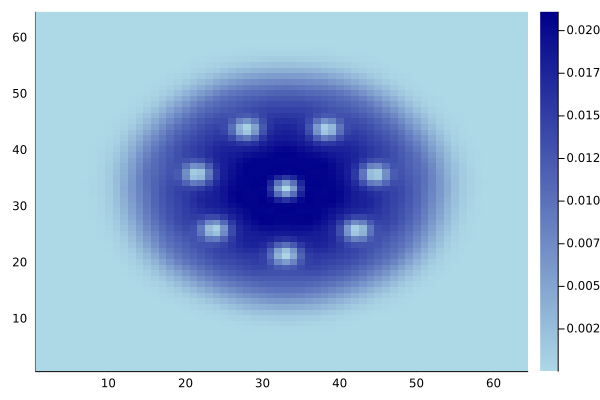

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)